In [1]:
#Project 1, Part 3
import matplotlib.pyplot as plt
import numpy as np
import math as m

In [2]:
#Define Prescribed Temperatures
T_t = 1000
T_b = 350

In [3]:
#Define Dimensions
w = 0.1
l = 0.1

In [4]:
#Define the number of x & y divisions
xdiv = 100
ydiv = 100
#Define linear spaces for x and y
x = np.linspace(0,l,xdiv)
y = np.linspace(0,w,ydiv)

In [5]:
#Make an empty coefficient matrix
A = np.zeros(shape=(xdiv*ydiv, xdiv*ydiv))
#Make an empty vector
B = np.zeros(shape=(xdiv*ydiv, 1))

In [6]:
indices = []
for i in range(xdiv*ydiv):
    indices.append(i+1)
#Assign values to the empty matrix and vector for each node
#Checks for an edge condition, where the value is directly assigned
#If not, applies the finite difference method, eqn. 4.29
for i in indices:
    if i<= xdiv:
        A[i-1,i-1]=1
        B[i-1]=T_t
    elif i>=((xdiv*ydiv)-(xdiv)+1):
        A[i-1,i-1]=1
        B[i-1]=T_b
    elif i%xdiv == 0:
        A[i-1,i-1]=1
        B[i-1]=T_b
    elif (i-1)%xdiv == 0:
        A[i-1,i-1]=1
        B[i-1]=T_b
    else:
        B[i-1]=0
        A[i-1,i-1]=4
        A[i-1,i]=-1
        A[i-1,i-2]=-1
        A[i-1,i+xdiv-1]=-1
        A[i-1,i-xdiv-1]=-1

In [7]:
#Find the vector C such that AC=B
C = np.linalg.solve(A,B)
#Rearrange into a 100x100 matrix
D = np.resize(C,(xdiv,ydiv))
#Flip the matrix to the correct orientation
D = np.flipud(D)
print(D)

[[ 350.          350.          350.         ...  350.
   350.          350.        ]
 [ 350.          350.07257768  350.14507898 ...  350.14507898
   350.07257768  350.        ]
 [ 350.          350.14523174  350.29031061 ...  350.29031061
   350.14523174  350.        ]
 ...
 [ 350.          546.38061838  674.70968939 ...  674.70968939
   546.38061838  350.        ]
 [ 350.          674.92742232  803.3290709  ...  803.3290709
   674.92742232  350.        ]
 [1000.         1000.         1000.         ... 1000.
  1000.         1000.        ]]


Text(0.5, 1.0, '100 x 100 Grid FDM Solution')

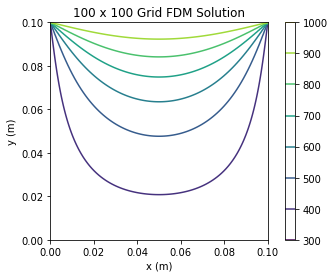

In [8]:
#Make a 2D Contour Plot
plt.contour(x,y,D)
ax = plt.gca()
ax.set_aspect('equal')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.colorbar()
plt.title('100 x 100 Grid FDM Solution')